In [11]:
import pandas as pd

df_listing = pd.read_csv('df_full_listing.csv')
df_listing.head()

,Unnamed: 0,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,1078,4635658,Tracy,2013-01-08,within an hour,100%,t,University of Texas,3.0,...,10.0,t,f,flexible,f,2,2,0,0,1.70
1,1,2265,2466,Paddy,2008-08-23,within a few hours,100%,t,East Downtown,3.0,...,9.0,f,f,strict_14_with_grace_period,f,3,2,1,0,0.19
2,2,5245,2466,Paddy,2008-08-23,within a few hours,100%,t,East Downtown,3.0,...,9.0,f,f,strict_14_with_grace_period,f,3,2,1,0,0.07
3,3,5456,8028,Sylvia,2009-02-16,within a few hours,100%,t,East Downtown,1.0,...,10.0,f,f,strict_14_with_grace_period,t,1,1,0,0,3.88
4,4,5769,8186,Elizabeth,2009-02-19,within an hour,100%,t,SW Williamson Co.,1.0,...,10.0,f,f,moderate,t,1,0,1,0,2.22


In [12]:
df_listing.shape
df_listing.columns

Index(['Unnamed: 0', 'id', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_

In [13]:
df_loc = df_listing[['latitude','longitude']]
df_sam = df_loc.sample(500) #training data
df_test = df_loc.sample(10) #test data


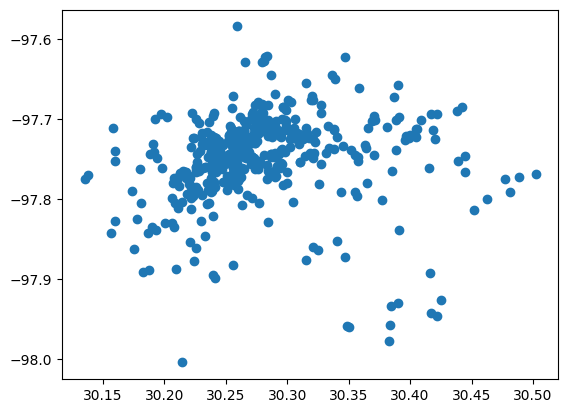

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df_sam['latitude'],df_sam['longitude'])

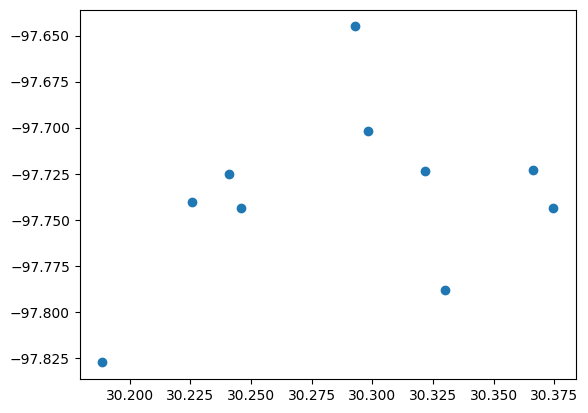

In [15]:
plt.scatter(df_test['latitude'], df_test['longitude'])

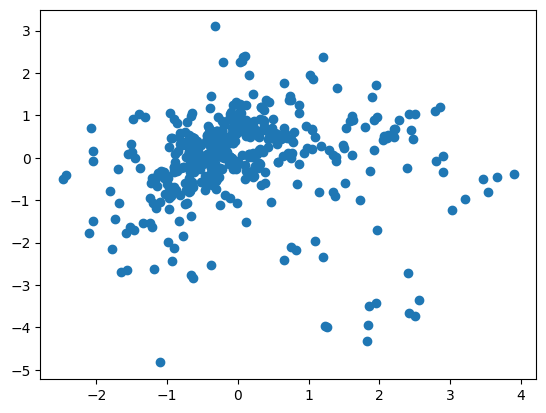

In [16]:
from sklearn import preprocessing

df_t2 =preprocessing.scale(df_test)
df_s2 = preprocessing.scale(df_sam)

plt.scatter(df_s2[:,0],df_s2[:,1])

#Hierarchical Clustering

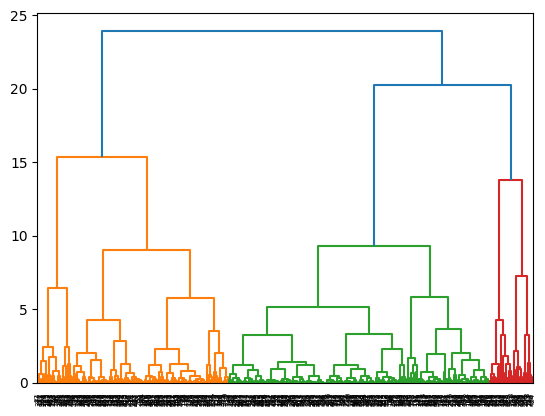

In [23]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(df_s2, method ='ward'))
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean',linkage='ward')

y_hc = hc.fit_predict(df_s2)

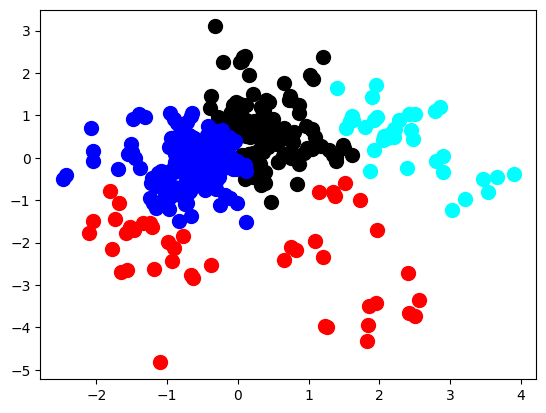

In [27]:
plt.scatter(df_s2[y_hc == 0,0],df_s2[y_hc == 0,1], s=100, c ='red')
plt.scatter(df_s2[y_hc == 1,0],df_s2[y_hc == 1,1], s=100, c ='black')
plt.scatter(df_s2[y_hc == 2,0],df_s2[y_hc == 2,1], s=100, c ='blue')
plt.scatter(df_s2[y_hc == 3,0],df_s2[y_hc == 3,1], s=100, c ='cyan')


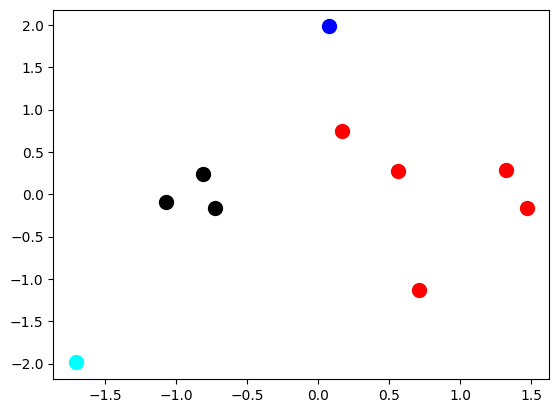

In [28]:
y_hc = hc.fit_predict(df_t2)
plt.scatter(df_t2[y_hc == 0,0],df_t2[y_hc == 0,1], s=100, c ='red')
plt.scatter(df_t2[y_hc == 1,0],df_t2[y_hc == 1,1], s=100, c ='black')
plt.scatter(df_t2[y_hc == 2,0],df_t2[y_hc == 2,1], s=100, c ='blue')
plt.scatter(df_t2[y_hc == 3,0],df_t2[y_hc == 3,1], s=100, c ='cyan')

#K-meansClustering

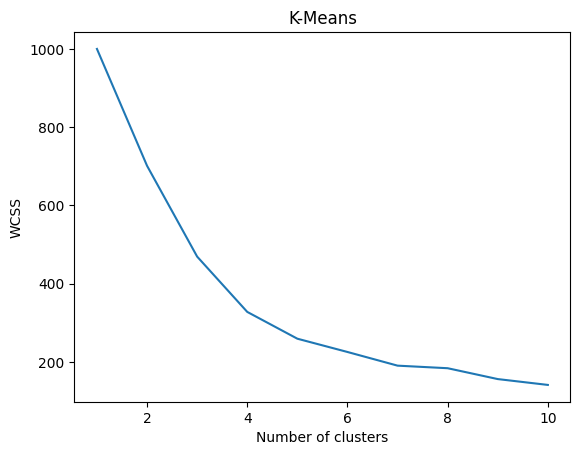

In [29]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters= i, init= 'k-means++',random_state=42)
    kmeans.fit(df_s2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('K-Means')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_s2)
print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(df_s2)

[[ 1.93645821  0.37577859]
 [-0.09981323  0.42297249]
 [-0.90259188 -0.79541111]
 [ 1.48270534 -3.18157982]]


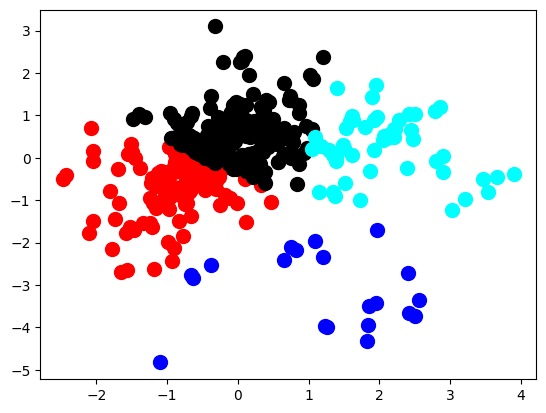

In [31]:
plt.scatter(df_s2[y_km == 0,0],df_s2[y_km == 0,1], s=100, c ='red')
plt.scatter(df_s2[y_km == 1,0],df_s2[y_km == 1,1], s=100, c ='black')
plt.scatter(df_s2[y_km == 2,0],df_s2[y_km == 2,1], s=100, c ='blue')
plt.scatter(df_s2[y_km == 3,0],df_s2[y_km == 3,1], s=100, c ='cyan')


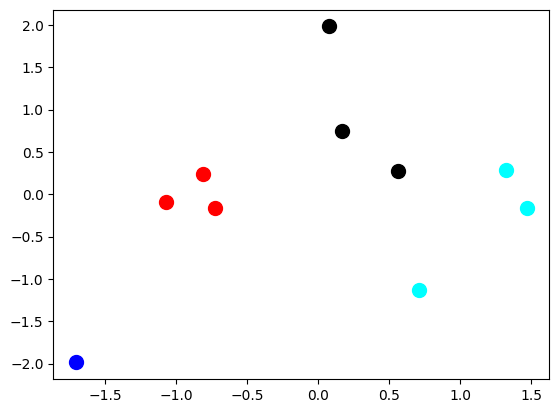

In [32]:
y_km = kmeans.fit_predict(df_t2)
plt.scatter(df_t2[y_km == 0,0],df_t2[y_km == 0,1], s=100, c ='red')
plt.scatter(df_t2[y_km == 1,0],df_t2[y_km == 1,1], s=100, c ='black')
plt.scatter(df_t2[y_km == 2,0],df_t2[y_km == 2,1], s=100, c ='blue')
plt.scatter(df_t2[y_km == 3,0],df_t2[y_km == 3,1], s=100, c ='cyan')